In [1]:
import mne
import os
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
from mne.preprocessing import ICA, create_ecg_epochs
from mne.preprocessing.ica import corrmap


from mne import io, EvokedArray
from mne.datasets import sample
from mne.decoding import Vectorizer, get_coef

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from mne.decoding import LinearModel

In [2]:
mne.set_log_level('INFO')
mne.get_config_path()
os.getcwd()
data_path = 'C:\\Users\\mingl\\Desktop\\02460_AML_course\\MNE_EEG\\'
raw_fname = data_path + 'faces_run1.bdf'
print(raw_fname)
raw = mne.io.read_raw_edf(raw_fname,preload=False)
print(raw)
print('_____')
print(raw.info)

C:\Users\mingl\Desktop\02460_AML_course\MNE_EEG\faces_run1.bdf
Extracting EDF parameters from C:\Users\mingl\Desktop\02460_AML_course\MNE_EEG\faces_run1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
<RawEDF  |  faces_run1.bdf, n_channels x n_times : 144 x 1341440 (655.0 sec), ~263 kB, data not loaded>
_____
<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | A1, A2, A3, A4, A5, A6, A7, A8, A9, ...
    chs : list | 144 items (EEG: 143, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 417.0 Hz
    meas_date : tuple | 2004-07-13 17:18:26 GMT
    nchan : int | 144
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 2048.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : None

In [3]:
raw_fname2 = data_path + 'faces_run2.bdf'
print(raw_fname2)
raw2 = mne.io.read_raw_edf(raw_fname2,preload=False)
print(raw2)
print('_____')
print(raw2.info)

C:\Users\mingl\Desktop\02460_AML_course\MNE_EEG\faces_run2.bdf
Extracting EDF parameters from C:\Users\mingl\Desktop\02460_AML_course\MNE_EEG\faces_run2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
<RawEDF  |  faces_run2.bdf, n_channels x n_times : 144 x 1394688 (681.0 sec), ~263 kB, data not loaded>
_____
<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | A1, A2, A3, A4, A5, A6, A7, A8, A9, ...
    chs : list | 144 items (EEG: 143, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 417.0 Hz
    meas_date : tuple | 2004-07-13 18:32:51 GMT
    nchan : int | 144
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 2048.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : None

In [4]:
print(raw.ch_names)
#cha_names2 = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32']
len(raw.ch_names)
print(raw2.ch_names)
#cha_names2 = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32']
len(raw2.ch_names)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'STI 014']
['A1', '

144

In [5]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[1])

Trigger channel has a non-zero initial value of 130560 (consider using initial_event=True to detect this event)
172 events found
Event IDs: [65152]
[23336 65024 65152]


In [6]:
events2 = mne.find_events(raw2, stim_channel='STI 014')
print(events2[1])

Trigger channel has a non-zero initial value of 130564 (consider using initial_event=True to detect this event)
173 events found
Event IDs: [ 65152 130564]
[36279 65024 65152]


In [7]:
use_precomputed = True
mne.io.concatenate_raws([raw, raw2])

<RawEDF  |  faces_run1.bdf, n_channels x n_times : 144 x 2736128 (1336.0 sec), ~263 kB, data not loaded>

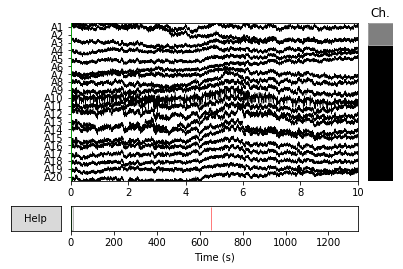

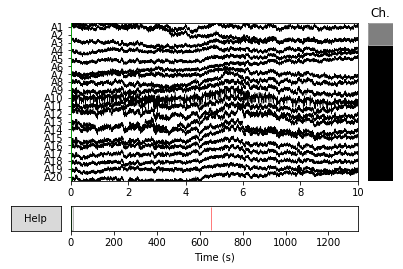

In [8]:
raw.plot()

In [12]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events.shape)
#print(events[171:])

Trigger channel has a non-zero initial value of 130560 (consider using initial_event=True to detect this event)
346 events found
Event IDs: [ 65152 130564]
(346, 3)


In [10]:
print(events[171:])

[[1307501   65024   65152]
 [1341440   65024  130564]
 [1343488   65028  130564]
 [1377719   65024   65152]
 [1385435   65024   65152]
 [1392981   65024   65152]
 [1400459   65024   65152]
 [1407936   65024   65152]
 [1415448   65024   65152]
 [1422926   65024   65152]
 [1430369   65024   65152]
 [1437881   65024   65152]
 [1445358   65024   65152]
 [1452836   65024   65152]
 [1460314   65024   65152]
 [1467894   65024   65152]
 [1475371   65024   65152]
 [1482951   65024   65152]
 [1490497   65024   65152]
 [1498043   65024   65152]
 [1505521   65024   65152]
 [1513101   65024   65152]
 [1520646   65024   65152]
 [1528124   65024   65152]
 [1535602   65024   65152]
 [1543079   65024   65152]
 [1550557   65024   65152]
 [1558034   65024   65152]
 [1565512   65024   65152]
 [1572989   65024   65152]
 [1580467   65024   65152]
 [1588013   65024   65152]
 [1595559   65024   65152]
 [1603036   65024   65152]
 [1610514   65024   65152]
 [1617992   65024   65152]
 [1625469   65024   65152]
 

In [13]:
myfile = open("condition_labels.txt", "rt")
contents = myfile.read()
labels = contents.split("\n")
labels = np.array(labels)

for i in range(172):
    if labels[i] == 'faces':
        events[i,1] = 0
        
    else:
        events[i,1] = 1
        
for i in range(174,346):
    if labels[i] == 'faces':
        events[i,1] = 0
        
    else:
        events[i,1] = 1
        

In [14]:
print(events.shape)


(346, 3)


In [8]:
#Mortage
#raw.info['bads'] = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp']
montage = mne.channels.read_montage(ch_names=cha_names,kind='biosemi128')
print(montage)
raw.set_montage(montage, set_dig=True)

NameError: name 'cha_names' is not defined

344 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 344 events and 1435 original time points ...
    Rejecting  epoch based on EEG : ['A11', 'A14']
    Rejecting  epoch based on EEG : ['EXG3']
    Rejecting  epoch based on EEG : ['A16']
    Rejecting  epoch based on EEG : ['EXG3']
    Rejecting  epoch based on EEG : ['C8', 'C9', 'EXG3', 'EXG7']
    Rejecting  epoch based on EEG : ['C8', 'C9']
    Rejecting  epoch based on EEG : ['C8', 'C9', 'C15', 'C16', 'C17', 'C18', 'C28', 'C29', 'EXG3']
    Rejecting  epoch based on EEG : ['C31']
    Rejecting  epoch based on EEG : ['C31']
    Rejecting  epoch based on EEG : ['C9', 'C31']
    Rejecting  epoch based on EEG : ['C8', 'C9', 'C16', 'C31']
    Rejecting  epoch based on EEG : ['C8', 'C9', 'C31', 'C32']
    Rejecting  epoch based on EEG : ['C8', 'C9']
    Rejecting  epoch based on EEG : ['C3', 'C8', 'C9', 'C15', 'C31', 'C32']
    Rejecting  epoch based on EEG

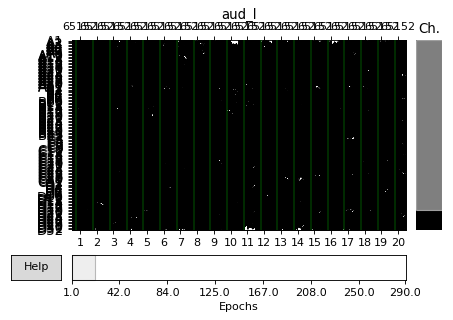

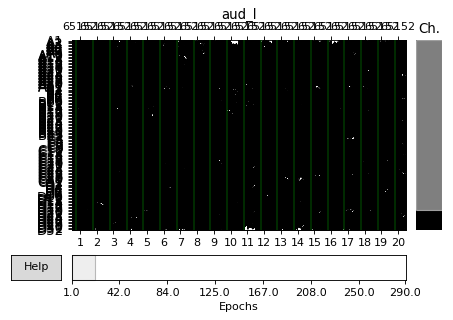

In [15]:
#Define epochs parameters:
event_id = dict(aud_l=65152)  # event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.6  # end of each epoch (500ms after the trigger)
reject = dict(eeg=200e-6)
picks = mne.pick_types(raw.info, meg=False, eeg=True,eog=True,  stim=False,exclude='bads')
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.5,proj=True, picks=picks, baseline=(None, 0),preload=True, reject=reject)
print(epochs)


epochs.drop_bad()
epochs.plot(picks=picks,block=True,n_channels=128,scalings='auto')


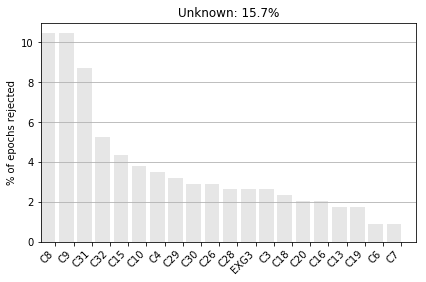

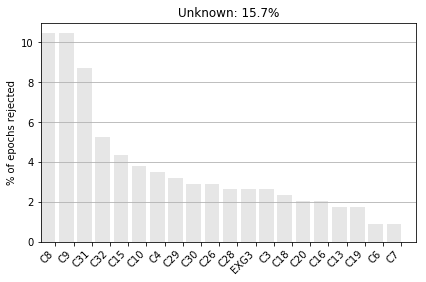

In [16]:
epochs.plot_drop_log()

In [17]:

Resample_epochs = mne.Epochs(raw, events, event_id=65152, tmin=-0.2, tmax=0.6, preload=True)
# Downsample to 100 Hz
print('Original sampling rate:', Resample_epochs.info['sfreq'], 'Hz')
epochs_resampled = epochs.copy().resample(100, npad='auto')
print('New sampling rate:', epochs_resampled.info['sfreq'], 'Hz')

344 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 344 events and 1640 original time points ...
0 bad epochs dropped
Original sampling rate: 2048.0 Hz
New sampling rate: 100.0 Hz


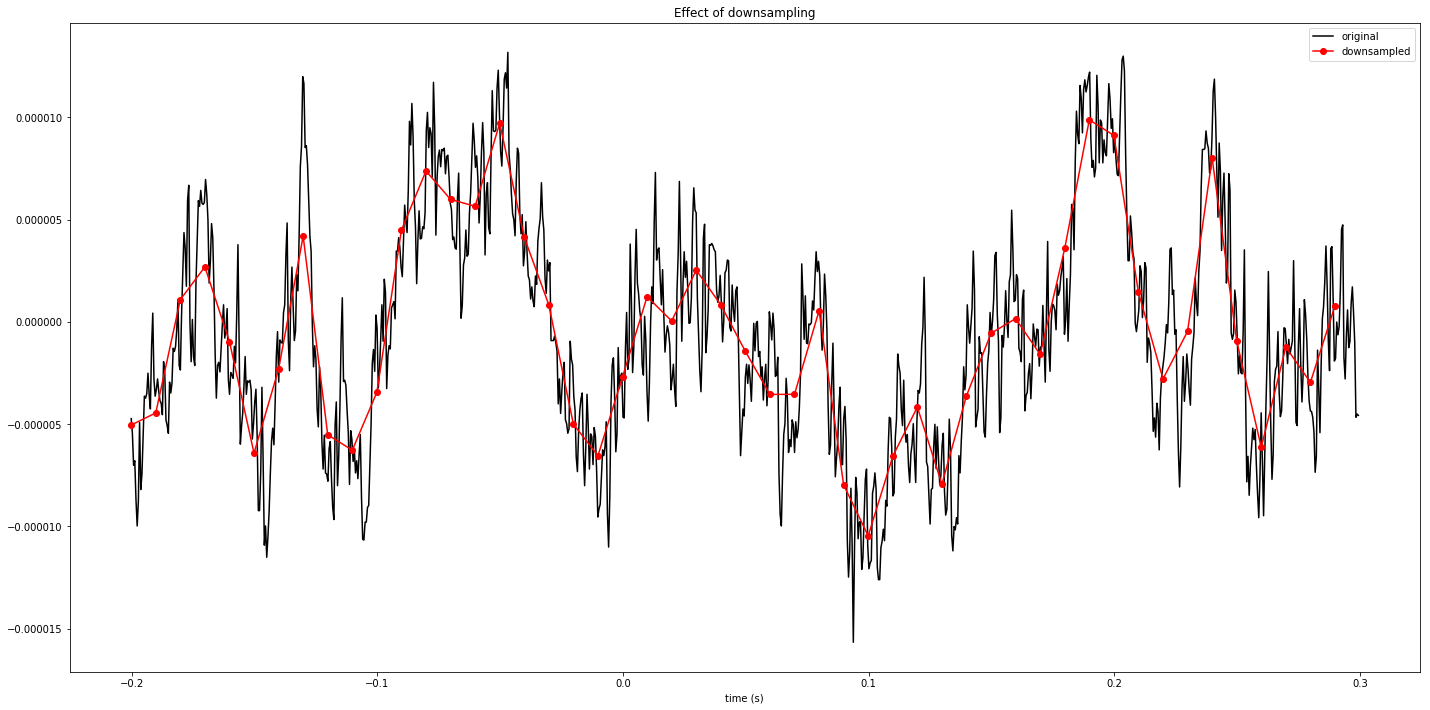

In [18]:
# Plot a piece of data to see the effects of downsampling
plt.figure(figsize=(20, 10))
n_samples_to_plot = int(0.5 * Resample_epochs.info['sfreq'])  # plot 0.5 seconds of data
plt.plot(Resample_epochs.times[:n_samples_to_plot],
         Resample_epochs.get_data()[0, 0, :n_samples_to_plot], color='black')

n_samples_to_plot = int(0.5 * epochs_resampled.info['sfreq'])
plt.plot(epochs_resampled.times[:n_samples_to_plot],
         epochs_resampled.get_data()[0, 0, :n_samples_to_plot],
         '-o', color='red')

plt.xlabel('time (s)')
plt.legend(['original', 'downsampled'], loc='best')
plt.title('Effect of downsampling')
mne.viz.tight_layout()

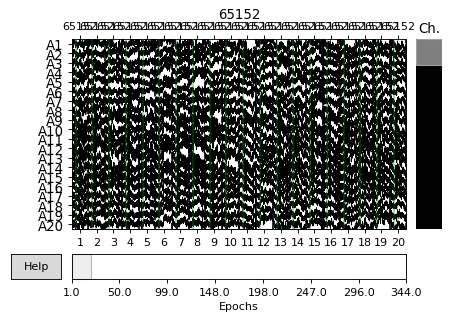

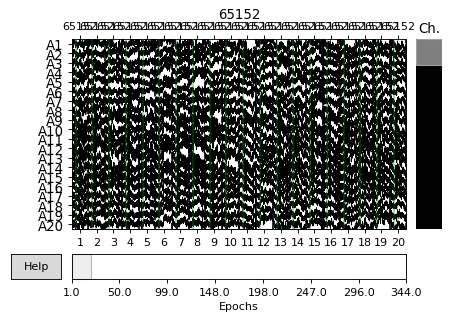

In [19]:
Resample_epochs.plot()

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


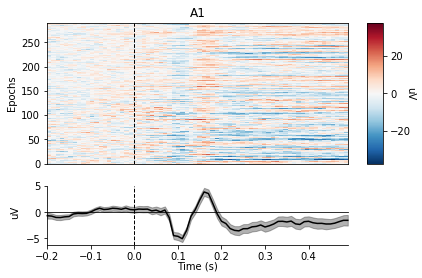

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


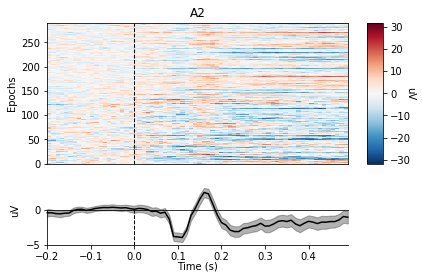

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


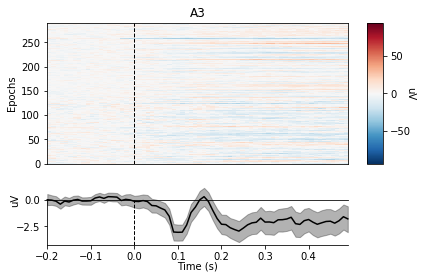

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


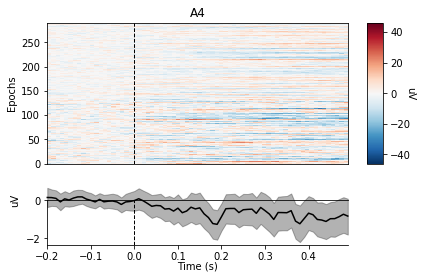

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


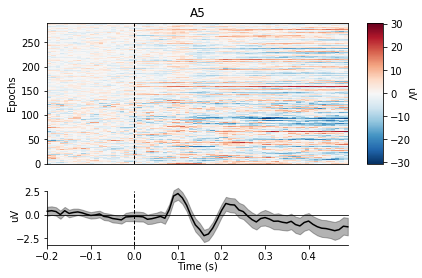

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


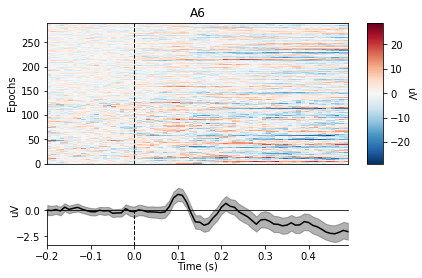

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


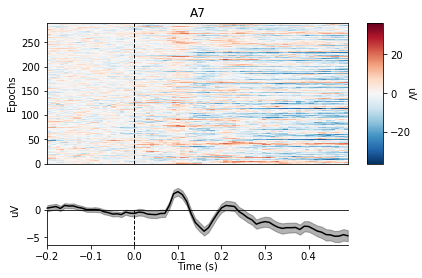

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


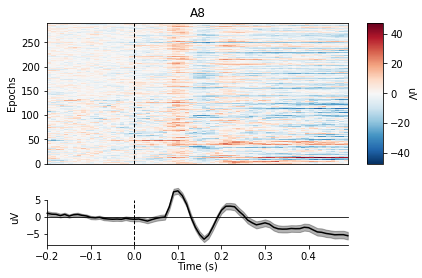

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


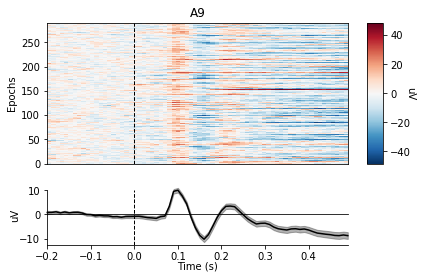

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


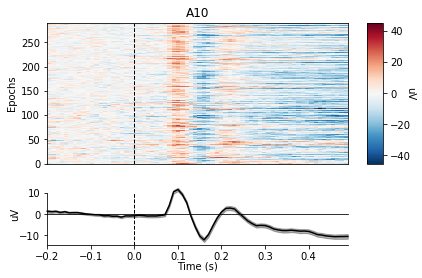

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


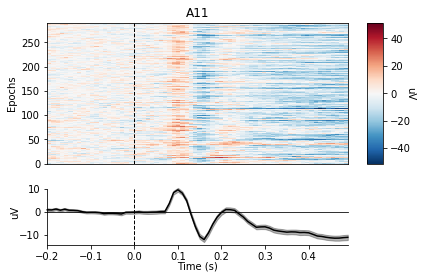

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


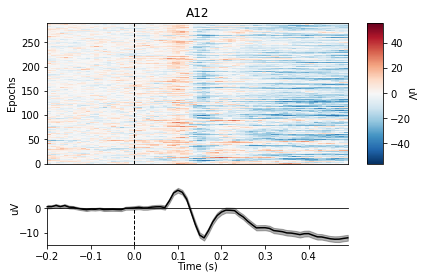

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


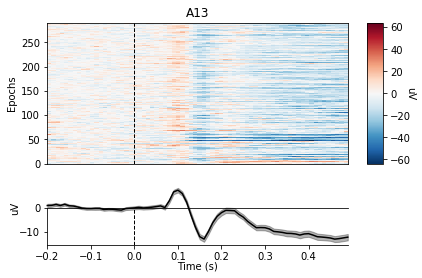

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


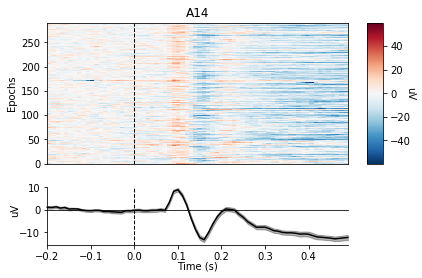

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


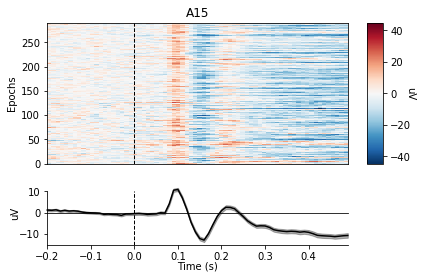

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


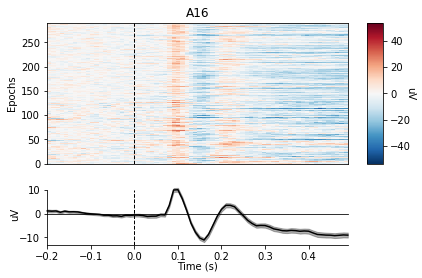

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


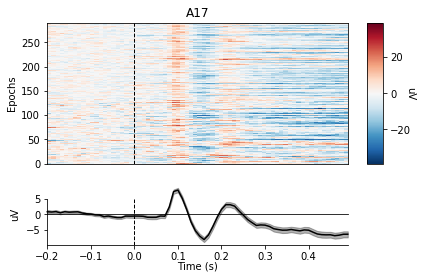

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


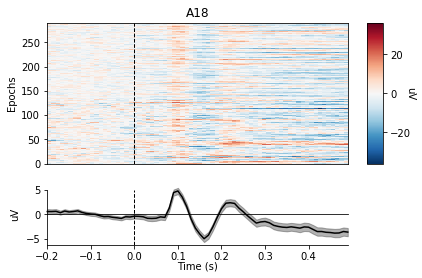

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


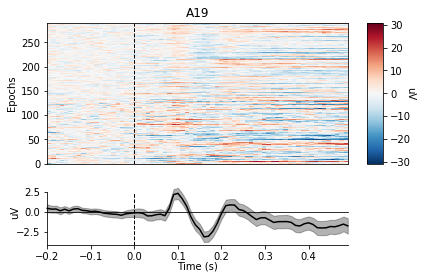

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


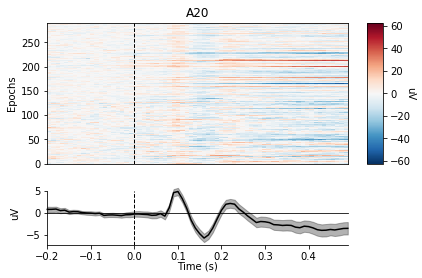

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


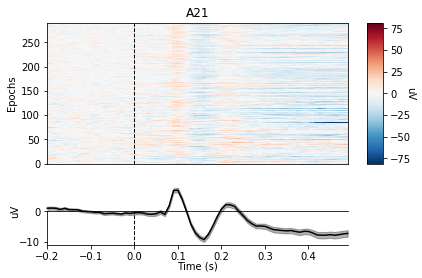

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


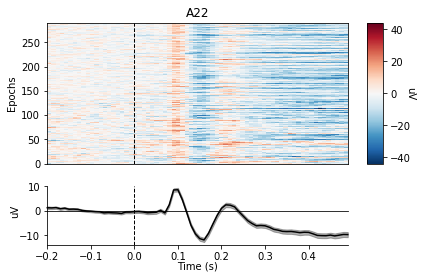

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


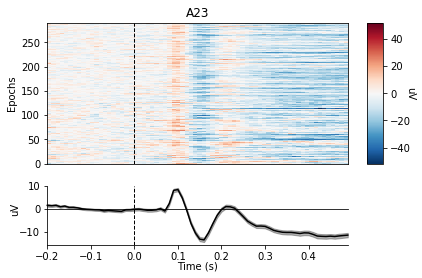

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


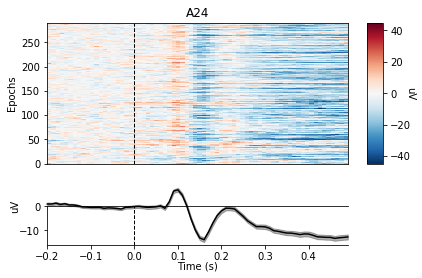

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


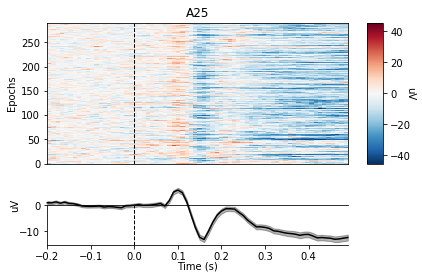

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


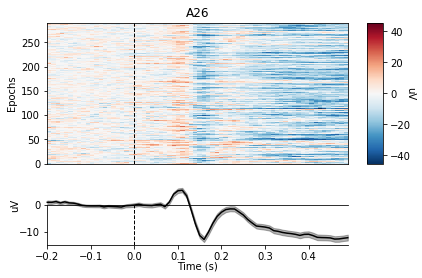

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


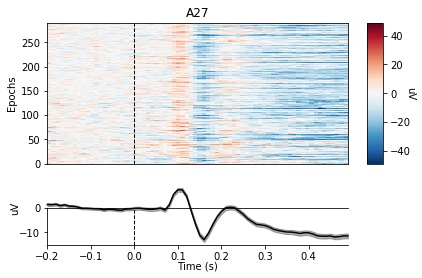

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


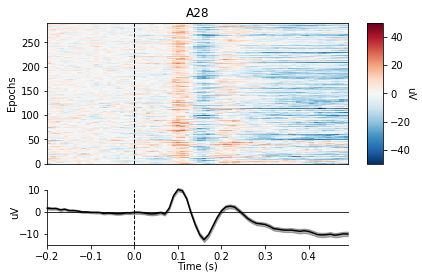

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


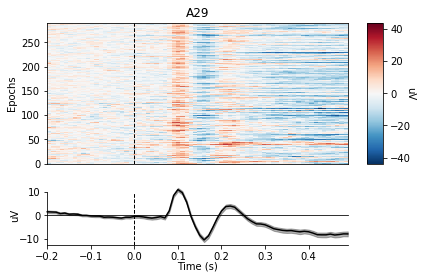

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


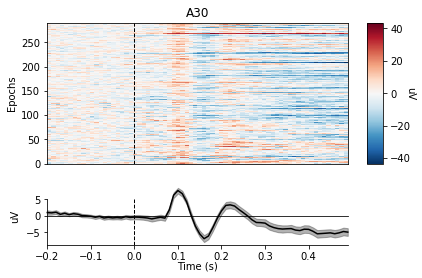

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


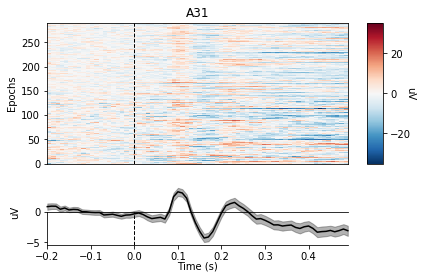

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


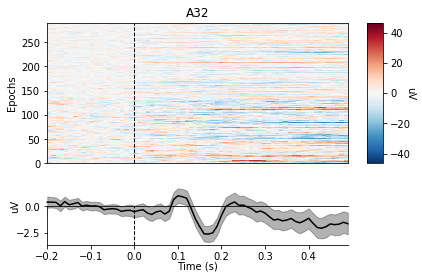

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


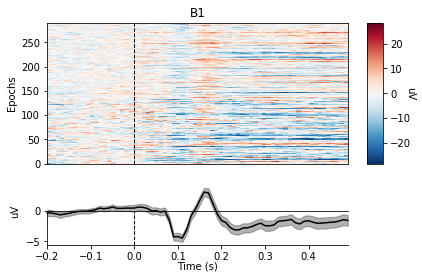

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


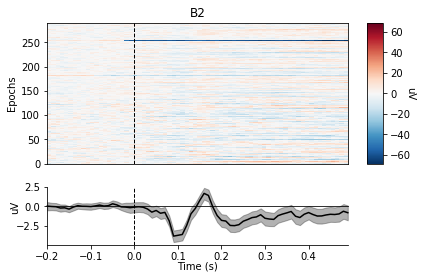

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


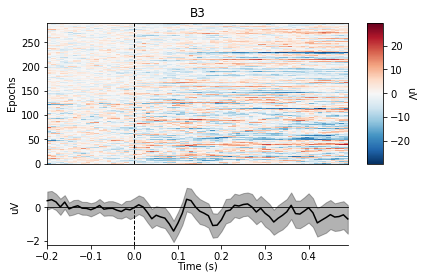

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


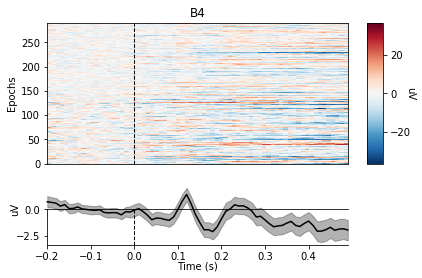

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


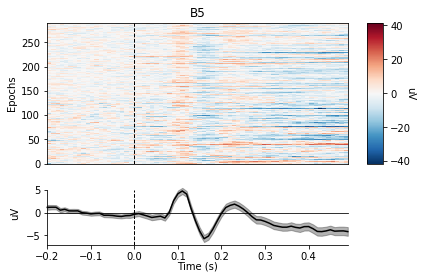

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


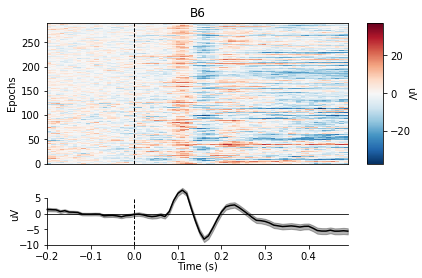

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


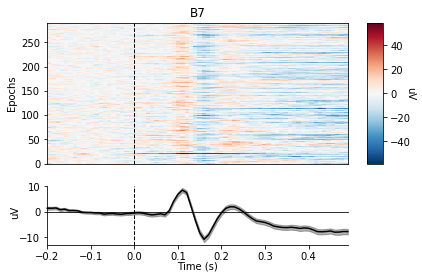

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


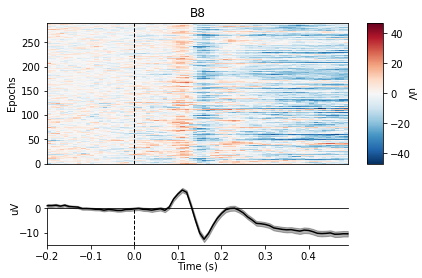

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


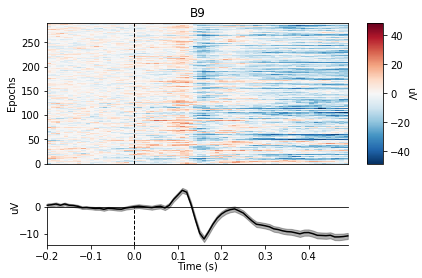

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


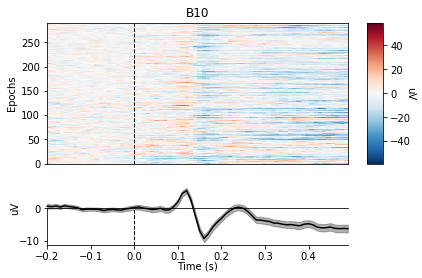

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


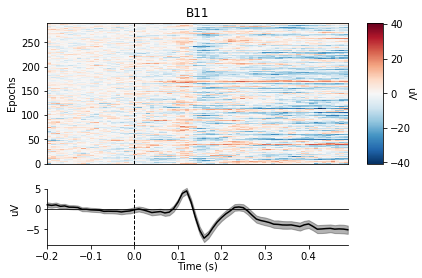

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


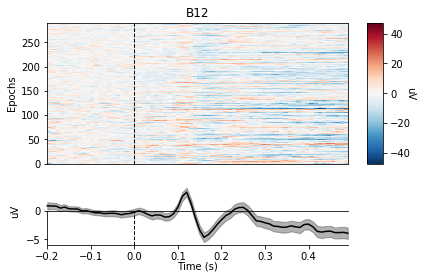

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


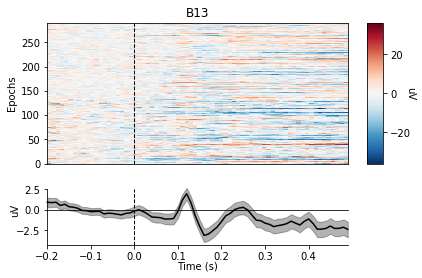

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


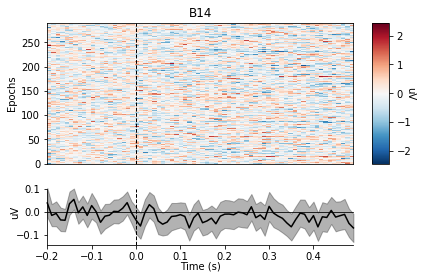

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


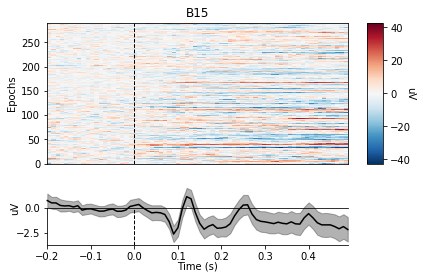

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


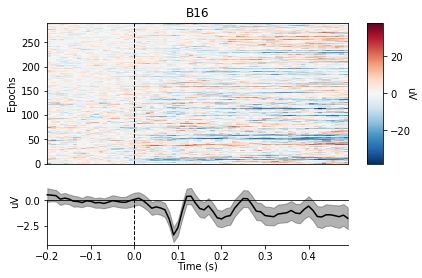

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


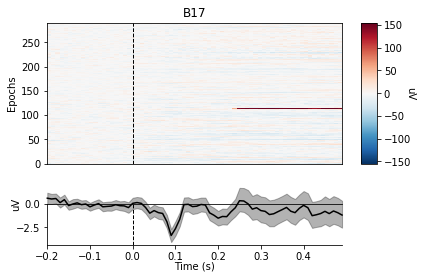

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


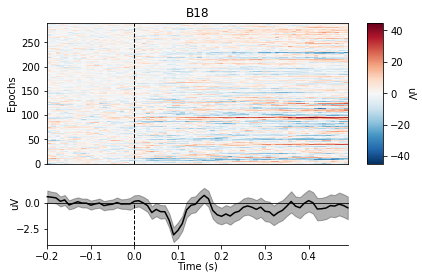

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


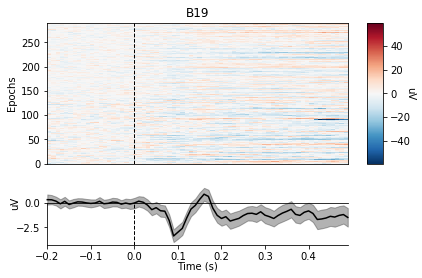

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


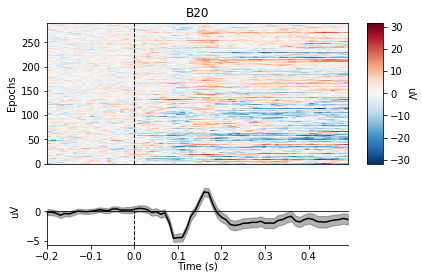

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


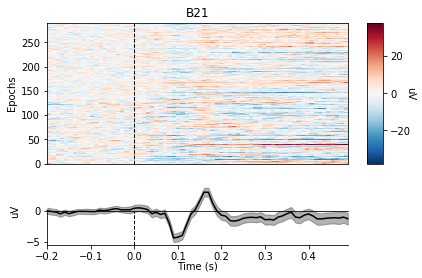

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


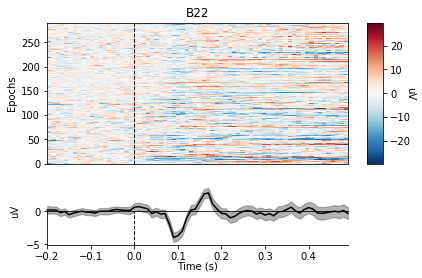

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


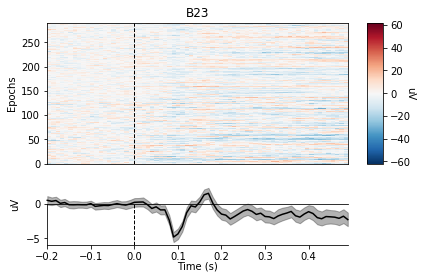

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


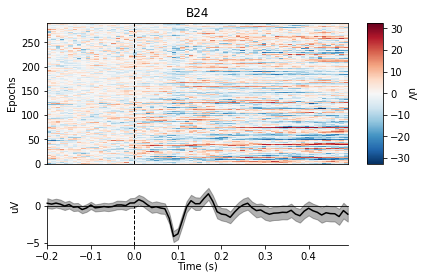

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


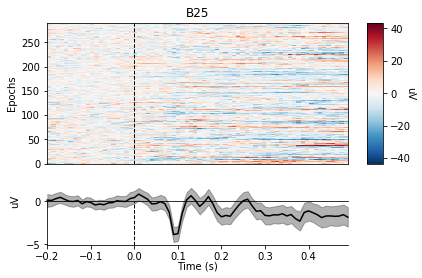

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


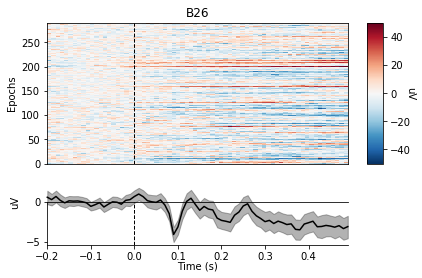

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


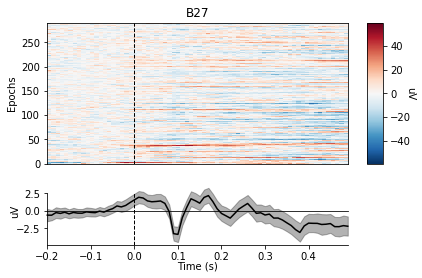

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


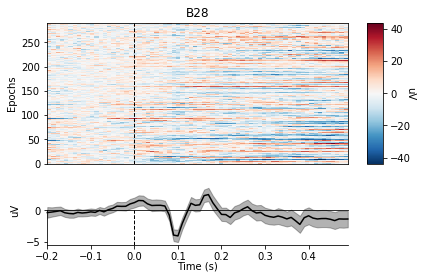

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


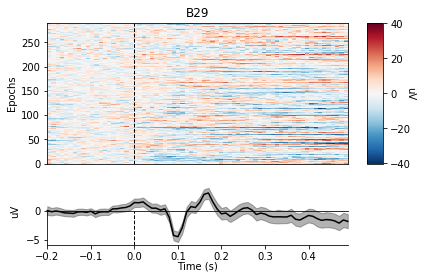

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


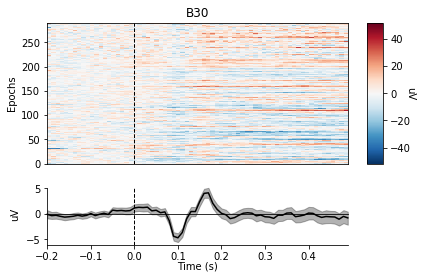

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


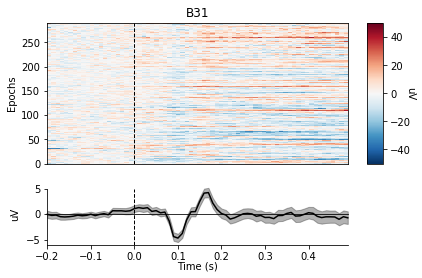

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


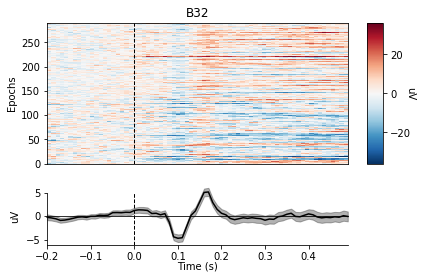

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


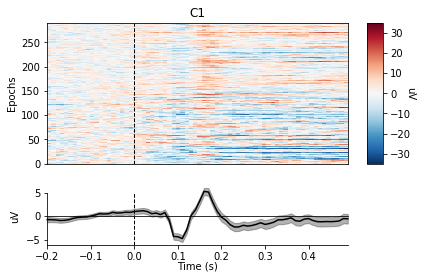

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


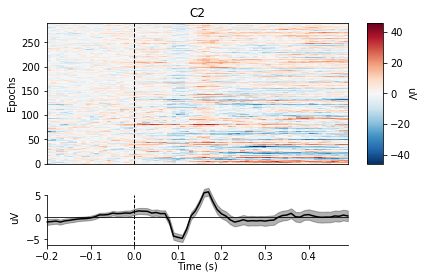

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


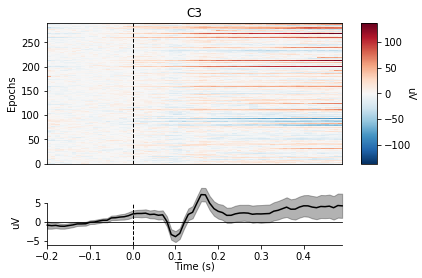

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


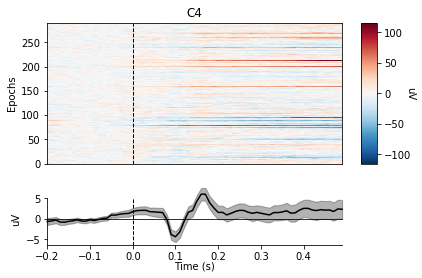

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


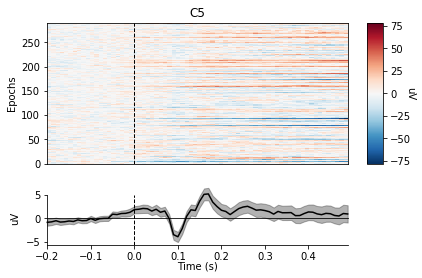

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


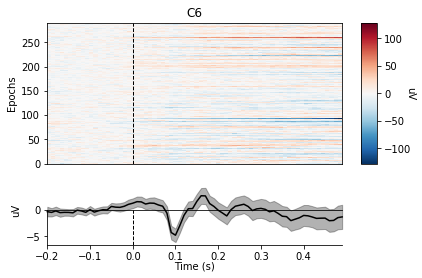

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


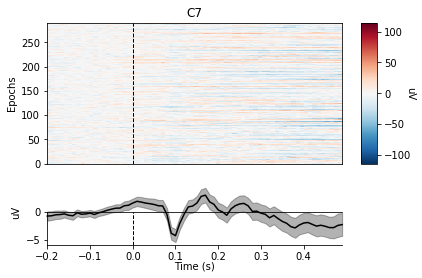

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


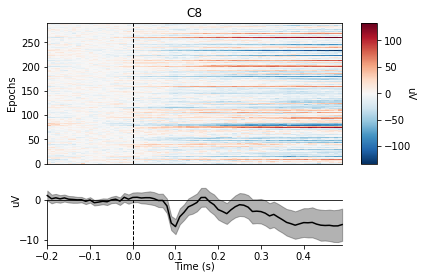

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


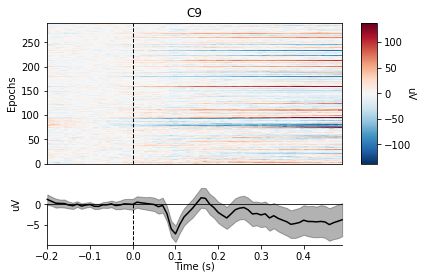

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


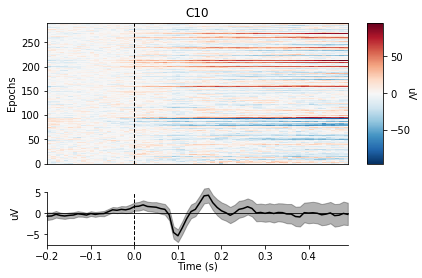

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


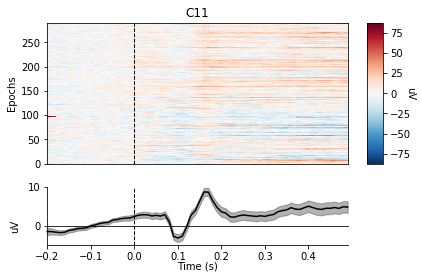

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


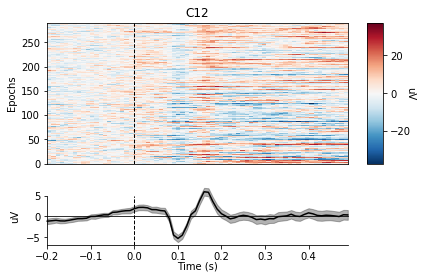

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


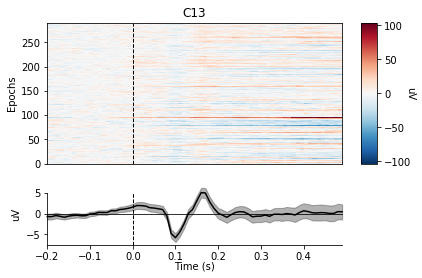

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


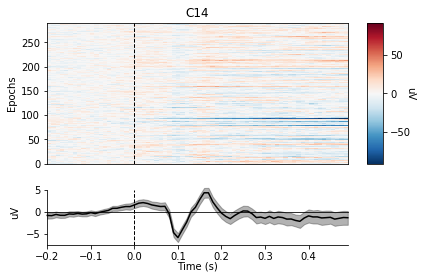

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


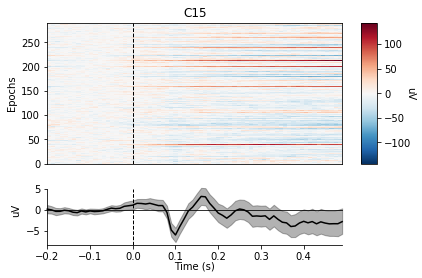

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


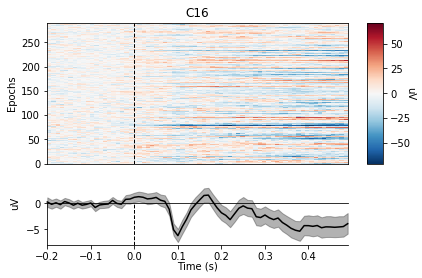

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


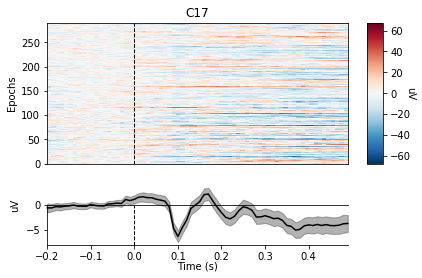

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


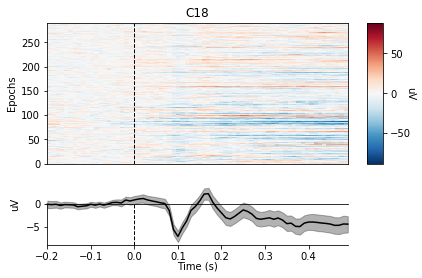

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


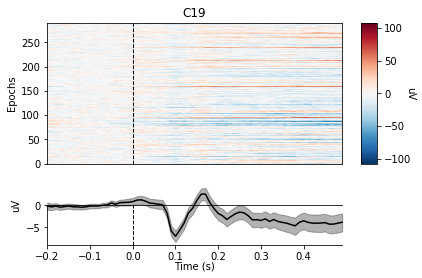

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


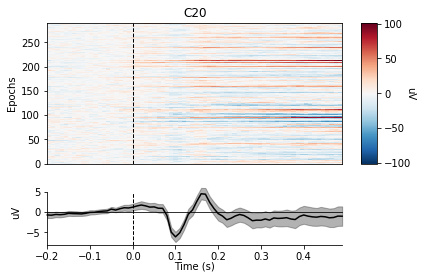

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


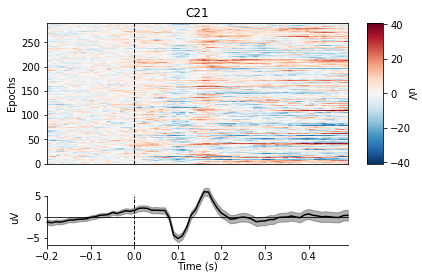

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


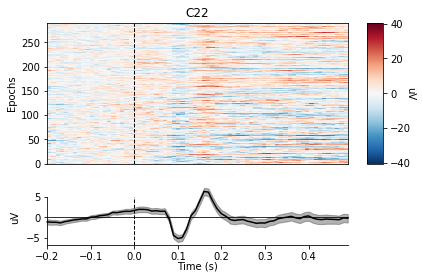

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


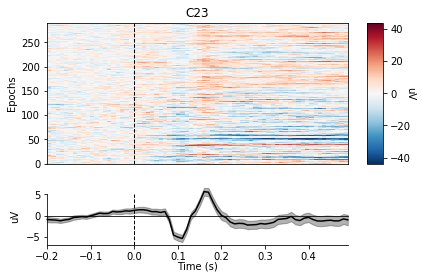

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


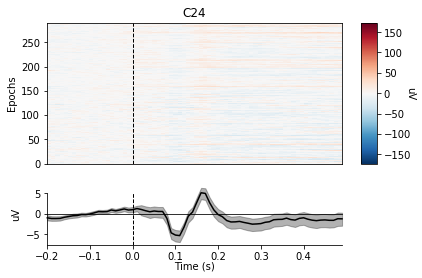

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


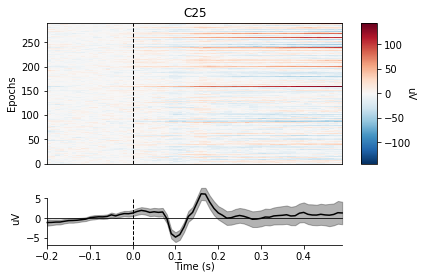

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


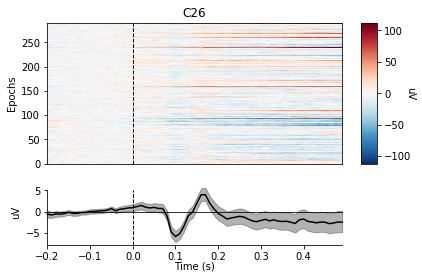

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


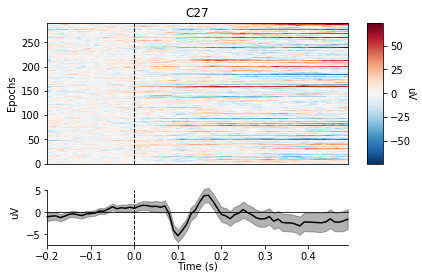

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


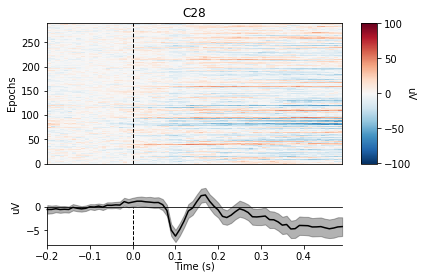

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


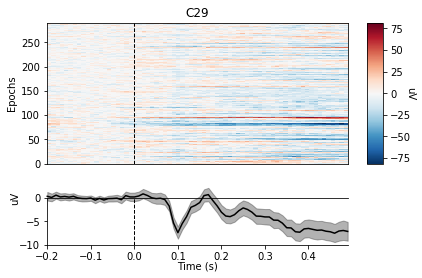

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


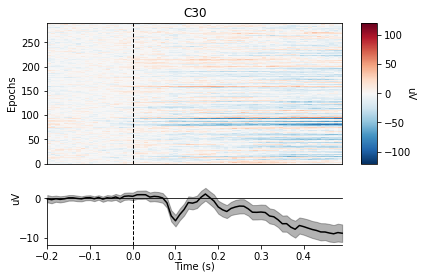

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


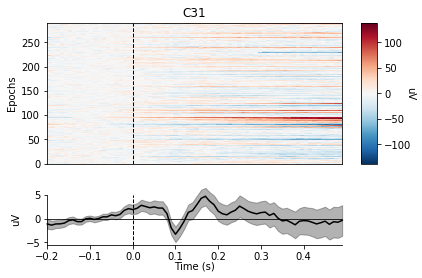

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


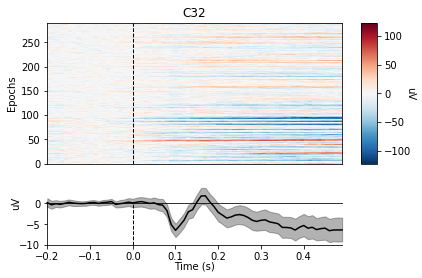

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


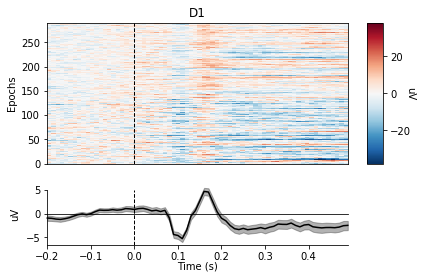

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


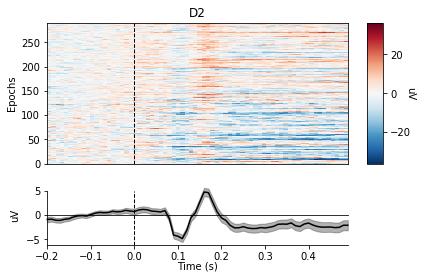

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


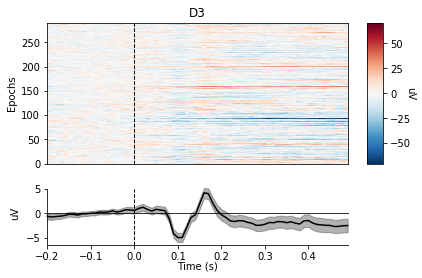

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


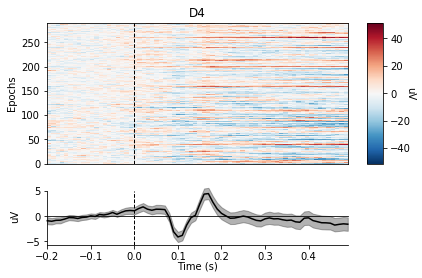

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


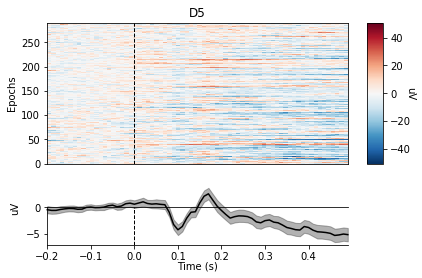

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


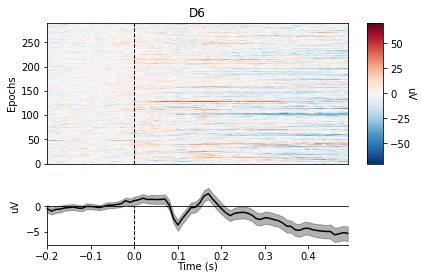

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


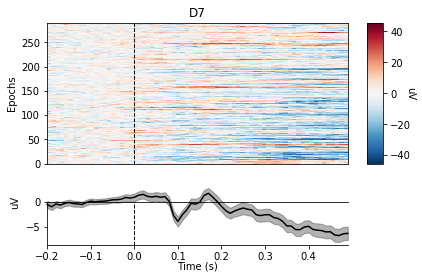

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


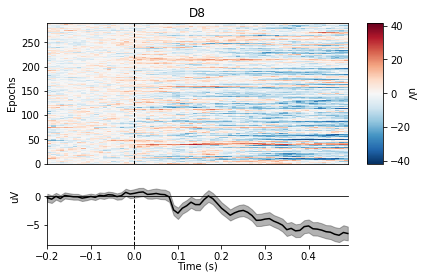

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


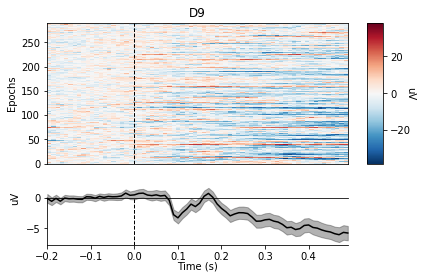

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


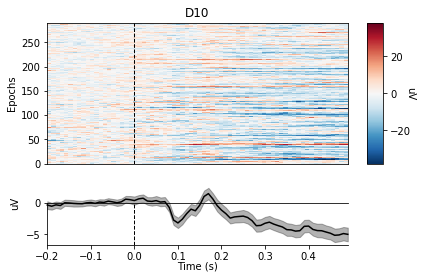

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


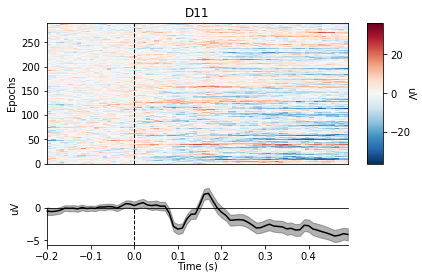

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


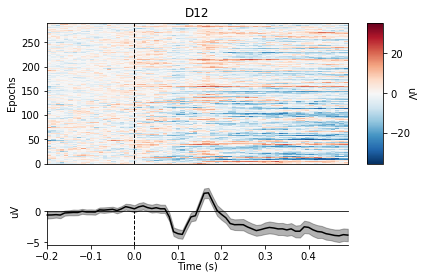

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


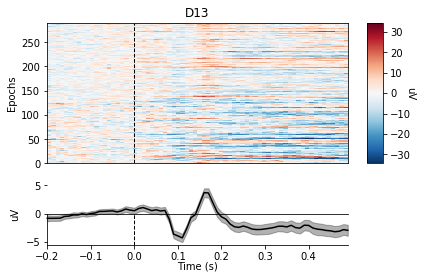

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


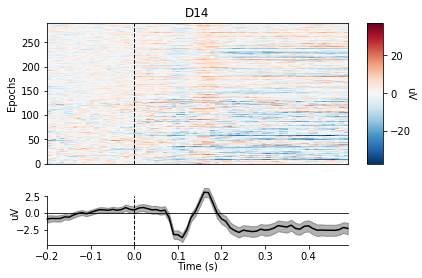

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


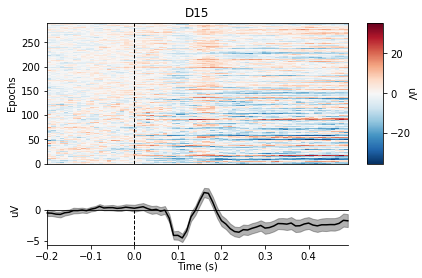

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


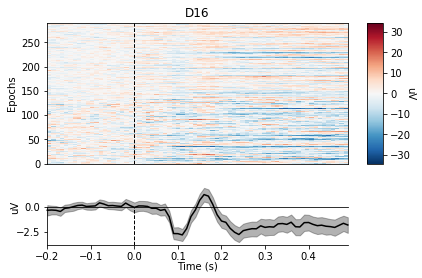

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


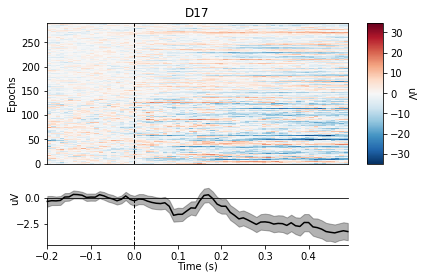

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


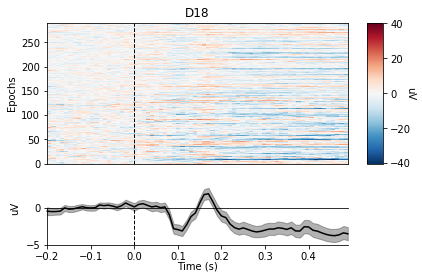

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


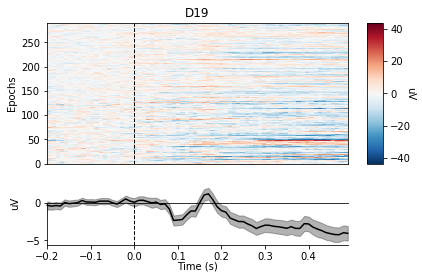

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


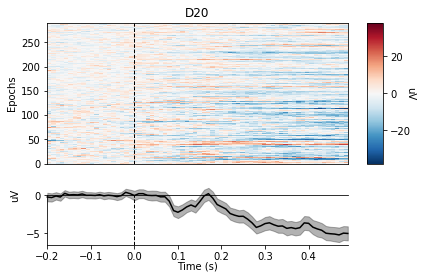

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


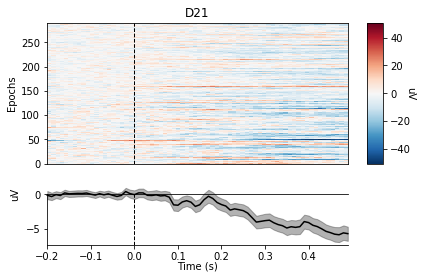

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


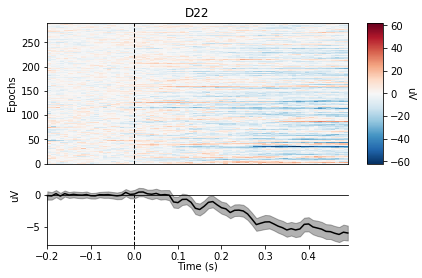

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


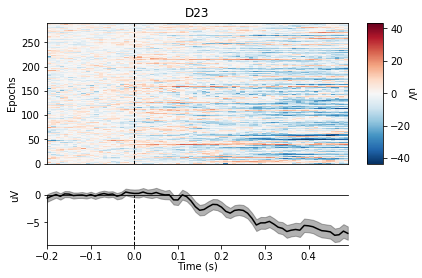

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


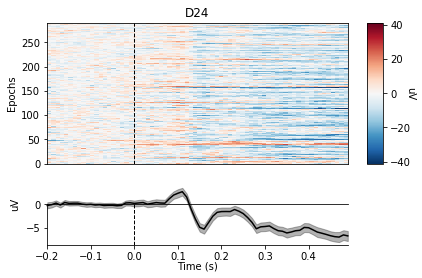

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


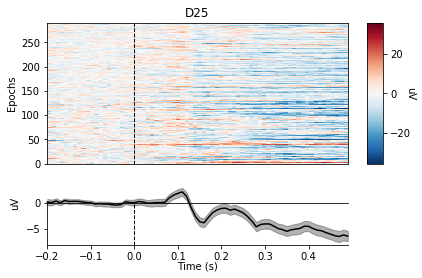

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


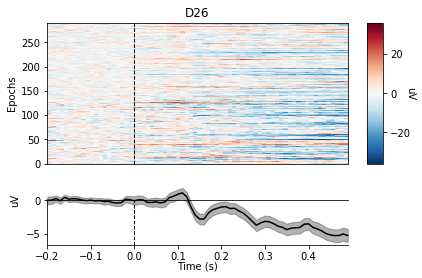

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


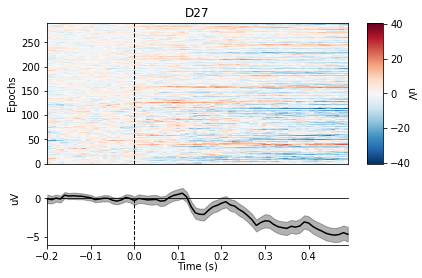

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


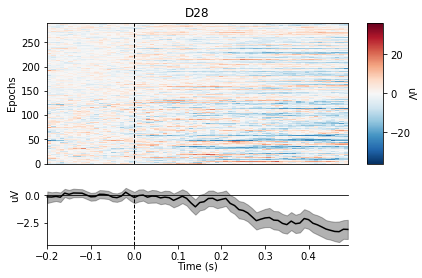

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


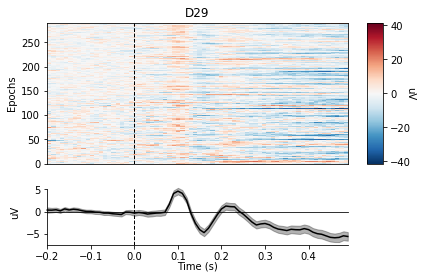

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


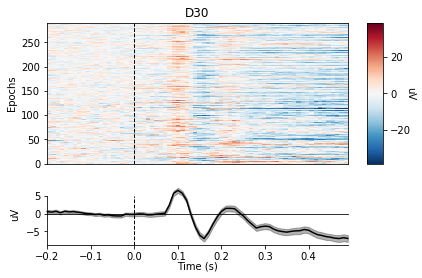

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


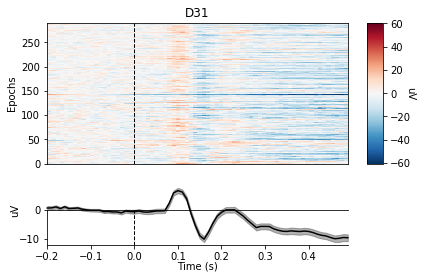

<ipython-input-20-9a03d204d62a>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_resampled.plot_image(i, cmap='interactive')


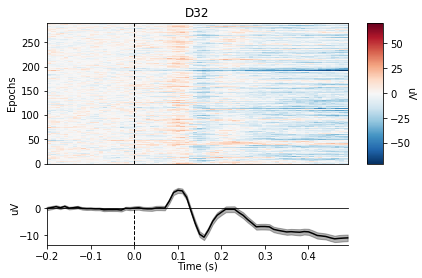

In [20]:
for i in range(128):
    epochs_resampled.plot_image(i, cmap='interactive')

In [21]:
#Get single epochs for one condition:
epochs_data = epochs['aud_l'].get_data()
print('epochs_data:',epochs_data.shape)
Resampled_epochs_data = epochs_resampled['aud_l'].get_data()
print('Resampled_epochs_data:',Resampled_epochs_data.shape)


epochs_data: (290, 143, 1435)
Resampled_epochs_data: (290, 143, 70)


In [22]:
Resampled_epochs_data[0].shape

(143, 70)

<Evoked  |  'aud_l' (mean, N=290), [-0.2002, 0.5] sec, 143 ch, ~1.8 MB>


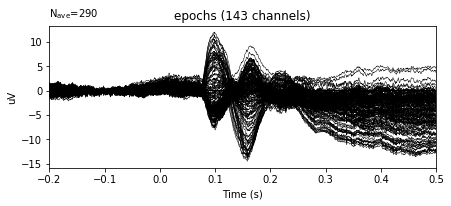

<Evoked  |  'aud_l' (mean, N=290), [-0.2002, 0.4898] sec, 143 ch, ~339 kB>


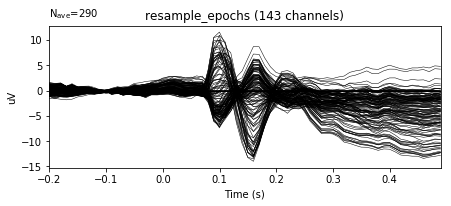

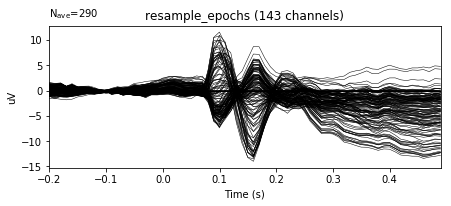

In [23]:
#Compute evoked responses for auditory responses by averaging and plot it:
evoked = epochs['aud_l'].average()
print(evoked)
evoked.plot(titles='epochs')

evoked_resampled = epochs_resampled['aud_l'].average()
print(evoked_resampled)
evoked_resampled.plot(titles='resample_epochs')

myfile = open("condition_labels.txt", "rt")
contents = myfile.read()
labels = contents.split("\n")
labels = np.array(labels)

for i in range(172):
    if labels[i] == 'faces':
        events[i,1] = 0
    else:
        events[i,1] = 1


In [25]:
# get MEG and EEG data
# Read epochs
#epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,decim=4, baseline=None, preload=True)
eeg_epochs = epochs_resampled.copy().pick_types(meg=False, eeg=True)
eeg_data = eeg_epochs.get_data().reshape(290, -1)#change  from eeg_epochs.get_data().reshape(len(labels), -1)
print('eeg_data.shape:',eeg_data.shape)

eeg_data.shape: (290, 10010)


In [75]:
eeg_epochs = epochs_resampled.copy().pick_types(meg=False, eeg=True)
eeg_data = eeg_epochs.get_data().reshape(133, -1)#change  from eeg_epochs.get_data().reshape(len(labels), -1)
print('eeg_data.shape:',eeg_data.shape)

eeg_data.shape: (143, 9310)


In [26]:
X = eeg_data
y = eeg_epochs.events[:,1]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)


In [33]:
#after  merge
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.49      1.00      0.66        47

   micro avg       0.49      0.49      0.49        96
   macro avg       0.24      0.50      0.33        96
weighted avg       0.24      0.49      0.32        96



C:\Users\mingl\AppData\Local\Continuum\anaconda3\envs\mne\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mingl\AppData\Local\Continuum\anaconda3\envs\mne\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
lengh=len(y_test)
y_test.reshape(lengh,1)

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [12]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.45      1.00      0.62        20

   micro avg       0.45      0.45      0.45        44
   macro avg       0.23      0.50      0.31        44
weighted avg       0.21      0.45      0.28        44



C:\Users\mingl\AppData\Local\Continuum\anaconda3\envs\mne\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mingl\AppData\Local\Continuum\anaconda3\envs\mne\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('confusion_matrix:',confusion_matrix(y_test,predictions))
print('classification_report:',classification_report(y_test,predictions))

C:\Users\mingl\AppData\Local\Continuum\anaconda3\envs\mne\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


confusion_matrix: [[ 0 49]
 [ 0 47]]
classification_report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.49      1.00      0.66        47

   micro avg       0.49      0.49      0.49        96
   macro avg       0.24      0.50      0.33        96
weighted avg       0.24      0.49      0.32        96



C:\Users\mingl\AppData\Local\Continuum\anaconda3\envs\mne\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
lengh=len(y_test)
predictions.reshape(lengh,1)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
kmeans.cluster_centers_
predictions=kmeans.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
kmeans.cluster_centers_.shape

[[17 32]
 [17 30]]
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        49
           1       0.48      0.64      0.55        47

   micro avg       0.49      0.49      0.49        96
   macro avg       0.49      0.49      0.48        96
weighted avg       0.49      0.49      0.48        96



(2, 10010)

In [42]:
lengh=len(y_test)
predictions.reshape(lengh,1)

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

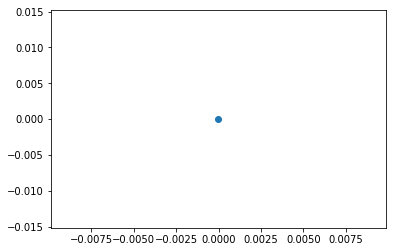

-4.389754188772763e-06
3.429628654725123e-07


In [41]:
plt.scatter(kmeans.cluster_centers_[0].mean(),kmeans.cluster_centers_[1].mean())
plt.show()
print(kmeans.cluster_centers_[0].mean())
print(kmeans.cluster_centers_[1].mean())

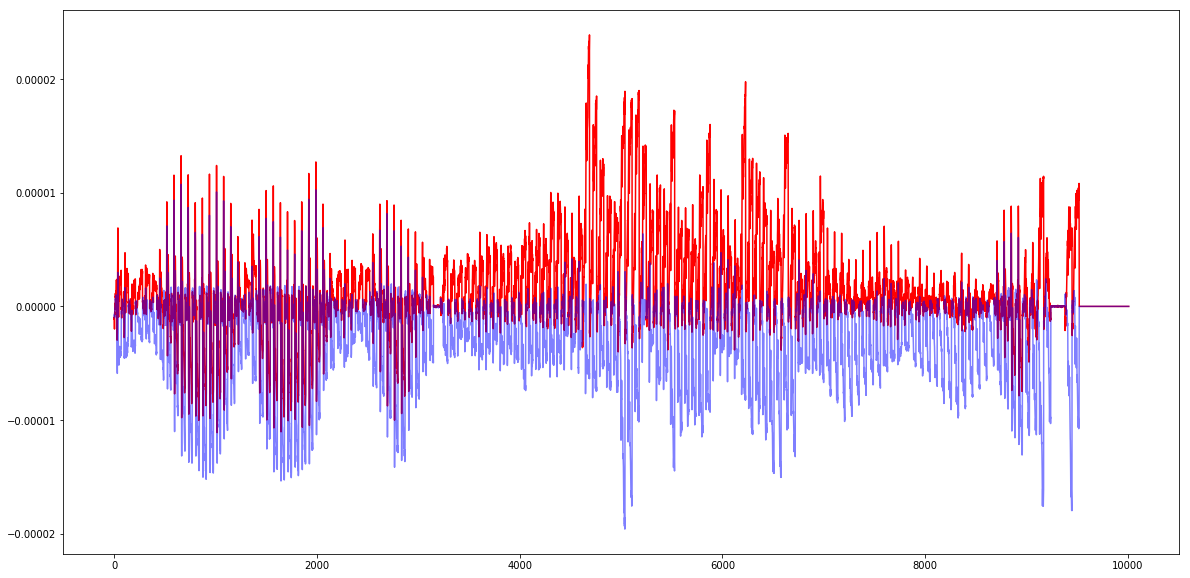

In [30]:
plt.figure(figsize=(20,10))
plt.plot(range(10010),kmeans.cluster_centers_[0],color='r')
plt.plot(range(10010),kmeans.cluster_centers_[1],color='b',alpha=0.5)
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

import mne
from mne.minimum_norm import apply_inverse_epochs, read_inverse_operator
from mne.decoding import (cross_val_multiscore, LinearModel, SlidingEstimator,
                          get_coef)

print(__doc__)

Automatically created module for IPython interactive environment


In [46]:



from mne.datasets import sample
from mne.minimum_norm import (make_inverse_operator, apply_inverse,
                              write_inverse_operator)
raw.info['bads'] = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp']
data_path = sample.data_path()

fname_fwd_eeg = data_path + '/MEG/sample/sample_audvis-eeg-oct-6-fwd.fif'
fname_cov = data_path + '/MEG/sample/sample_audvis-shrunk-cov.fif'


snr = 3.0
lambda2 = 1.0 / snr ** 2

# Load data

forward_eeg = mne.read_forward_solution(fname_fwd_eeg)
noise_cov = mne.read_cov(fname_cov)


forward_eeg = mne.read_forward_solution(fname_fwd_eeg)

# make an M/EEG, MEG-only, and EEG-only inverse operators
info = evoked.info

inverse_operator_eeg = make_inverse_operator(info, forward_eeg, noise_cov)

write_inverse_operator('sample_audvis-eeg-oct-6-inv.fif',inverse_operator_eeg)

# Compute inverse solution
stcs = dict()

stcs['eeg'] = apply_inverse(evoked, inverse_operator_eeg, lambda2, "dSPM",pick_ori=None)

# Save result in stc files
names = [ 'eeg']
for name in names:
    stcs[name].save('mne_dSPM_inverse-%s' % name)

Reading forward solution from C:\Users\mingl\mne_data\MNE-sample-data/MEG/sample/sample_audvis-eeg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (7498 sources, 60 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame
    365 x 365 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 59) active
Reading forward solution from C:\Users\mingl\mne_data\MNE-sample-data/MEG/sample/sample_audvis-eeg-oct-6-fwd.fif...
    Reading a source space...
  

ValueError: No channels match the selection.